In [1]:
import pandas as pd
from CTL2.causal_tree_learn import CausalTree
from DGP.dgp2 import dgp2
from DGP.dgp1 import dgp1
from DGP.dgp3 import dgp3

from MC.mc1 import MC_MSE_1
from MC.mc2 import MC_MSE_2
import timeit
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from random import random

from sklearn.metrics import mean_squared_error as mse

import pickle as pkl
from knockknock import email_sender
from notify_run import Notify 
notify = Notify() 

In [2]:
def mcreps_mse_all(reps, n, nomin_test):    
    ATE1 = []
    ATE0 = []
    MSEt = []
    true = np.ones(reps)
    
    for i in range(reps):
        x_train, x_test, y_train, y_test, treat_train, treat_test = dgp3(n)
        x1 = x_test[:,0]
        ctl_predict = MC_MSE_2(x_train, x_test, y_train, y_test, treat_train, treat_test, nomin_test)
        ATE1.append(np.mean(ctl_predict[np.where(x1 > 0)]))
        ATE0.append(np.mean(ctl_predict[np.where(x1 < 0)]))
        MSEt.append(np.sum(np.square(np.subtract(y_test[:,0],ctl_predict)))/n)

    mse_total = np.sum(np.array(MSEt))/reps
    mse1 = mse(np.array(ATE1),true)
    mse2 = mse(np.array(ATE0),true*-1)
    bias1 = np.sum(np.subtract(np.array(ATE1),true))/reps
    bias2 = np.sum(np.add(np.array(ATE0), true))/reps
    var1 = np.var(ATE1)
    var2 = np.var(ATE0)
    return mse1, mse2, bias1, bias2, var1, var2, mse_total

In [4]:
MSE1 = []
MSE2 = []
BIAS1 = []
BIAS2 = []
VAR1 = []
VAR2 = []
MSE_TOTAL = []

test_sizes = [0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.75]

n = 1000
reps = 500

for size in test_sizes:
    mse1, mse2, bias1, bias2, var1, var2, mse_total = mcreps_mse_all(reps,n,size)    
    MSE1.append(mse1)
    MSE2.append(mse2)
    BIAS1.append(bias1)
    BIAS2.append(bias2)
    VAR1.append(var1)
    VAR2.append(var2)
    MSE_TOTAL.append(mse_total)
    
notify.send('Done running the simulations') 

In [5]:
df = pd.DataFrame([test_sizes, MSE1, MSE2, BIAS1, BIAS2, VAR1, VAR2]).transpose().set_index(0)
df.columns=['MSE1', 'MSE2', 'BIAS1', 'BIAS2', 'VAR1', 'VAR2']

In [6]:
with open('test_8_500_1000.pkl','wb') as f:
    pkl.dump(df, f)

In [43]:
with open('test1.pkl','rb') as f:
    df = pkl.load(f)

In [7]:
df

,MSE1,MSE2,BIAS1,BIAS2,VAR1,VAR2
0,,,,,,
0.25,0.175236,0.189333,-0.070723,0.059330,0.170234,0.185813
0.30,0.151554,0.168603,-0.094193,0.091370,0.142682,0.160255
0.35,0.132250,0.129276,-0.108429,0.104286,0.120493,0.118401
0.40,0.102029,0.097635,-0.103664,0.083333,0.091283,0.090691
0.50,0.092636,0.090115,-0.109672,0.101280,0.080608,0.079857
0.60,0.079619,0.097760,-0.110954,0.142834,0.067309,0.077359
0.70,0.113973,0.116840,-0.194392,0.205625,0.076185,0.074559
0.75,0.139793,0.128258,-0.239417,0.228907,0.082473,0.075859


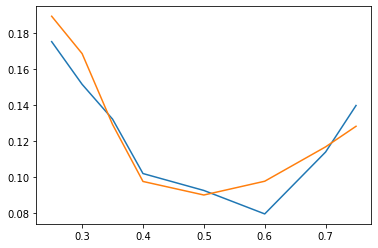

In [8]:
plt.plot(df['MSE1'])
plt.plot(df['MSE2'])

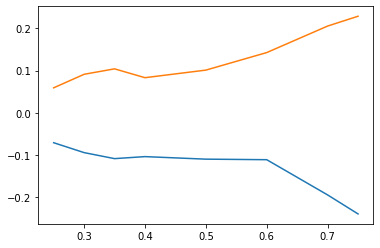

In [9]:
plt.plot(test_sizes, BIAS1)
plt.plot(test_sizes, BIAS2)

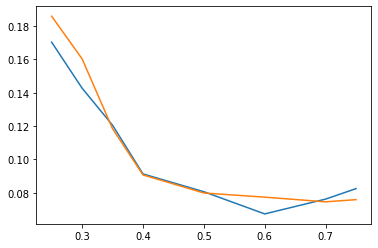

In [10]:
plt.plot(test_sizes, VAR1)
plt.plot(test_sizes, VAR2)

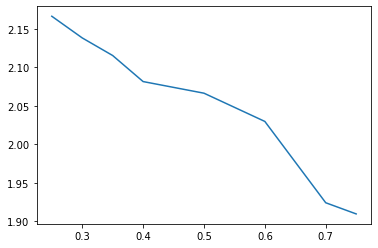

In [11]:
plt.plot(test_sizes, MSE_TOTAL)

In [55]:
test_sizes = [0.2, 0.25, 0.3, 0.4, 0.5]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
done
done
done


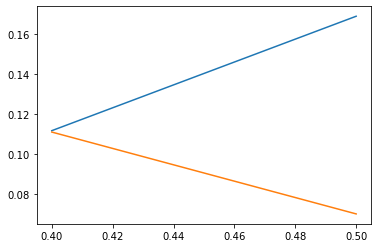

In [13]:
plt.plot(test_sizes, MSE1)
plt.plot(test_sizes, MSE2)

In [ ]:
test_sizes = [0.2, 0.3, 0.5, 0.7]

MSE1 = []
MSE2 = []

n = 1000
reps = 100
nomin_test = 0.5

for size in test_sizes:
    mse1, mse2 = mcreps2(reps,n,nomin_test)
    MSE1.append(mse1)
    MSE2.append(mse2)

done
done
